In [47]:
#importing important liabries 
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


# To ignore all warnings (not recommended unless you are sure)
warnings.filterwarnings("ignore")

In [26]:
# Load the dataset from the CSV file
data = pd.read_csv('Fatala-Police-Killing-in-the-USA_main_fatal_police_killings_in_the_USA_DownloadedData_fatal-police-shootings-data.csv')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [27]:
#Explore dataset statistics
data.describe()

,id,age,longitude,latitude
count,7662.000000,7198.000000,6832.000000,6832.000000
mean,4232.256983,37.154210,-97.056950,36.669658
std,2392.923808,12.944269,16.597978,5.394650
min,3.000000,2.000000,-160.007000,19.498000
25%,2148.250000,27.000000,-112.042250,33.480000
50%,4256.500000,35.000000,-94.242000,36.095500
75%,6306.750000,45.000000,-83.083250,40.025250
max,8336.000000,92.000000,-67.867000,71.301000


In [28]:
#Check for missing values
data.isnull().sum()

id                            0
name                        399
date                          0
manner_of_death               0
armed                       209
age                         464
gender                       18
race                       1424
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        853
body_camera                   0
longitude                   830
latitude                    830
is_geocoding_exact            0
dtype: int64

In [29]:
# Calculate percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a summary dataframe with columns and their corresponding missing percentage
missing_data_summary = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing Percentage': missing_percentage.values
})

# Set the threshold for missing values percentage (e.g., 10%)
threshold = 10

# List columns where missing percentage is above the threshold
columns_above_threshold = missing_data_summary[missing_data_summary['Missing Percentage'] > threshold]['Column']

# Output the summary
missing_data_summary

,Column,Missing Percentage
0,id,0.000000
1,name,5.207518
2,date,0.000000
3,manner_of_death,0.000000
4,armed,2.727747
5,age,6.055860
6,gender,0.234926
7,race,18.585226
8,city,0.000000
9,state,0.000000


In [30]:
def miss(data):
    missing_percentage = (data.isnull().sum() / len(data)) * 100
    return missing_percentage

In [31]:
# Handle missing values (if any)
# For simplicity, removing rows with missing values  
data = data.dropna()

In [32]:
#now all the null values are removed 
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
longitude                  0
latitude                   0
is_geocoding_exact         0
dtype: int64

In [33]:
#Check the data types of each column in the DataFrame
data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [34]:
# Check for duplicates.
data.duplicated().sum()

0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for categorical columns
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 1)
sns.countplot(x='manner_of_death', data=data)
plt.subplot(3, 3, 2)
sns.countplot(x='gender', data=data)
plt.subplot(3, 3, 4)
sns.countplot(x='race', data=data)
plt.xticks(rotation=45)
plt.subplot(3, 3, 5)
sns.countplot(x='signs_of_mental_illness', data=data)
plt.subplot(3, 3, 6)
sns.countplot(x='threat_level', data=data)
plt.subplot(3, 3, 7)
sns.countplot(x='flee', data=data)
plt.subplot(3, 3, 8)
sns.countplot(x='body_camera', data=data)
plt.tight_layout()
plt.show()

In [ ]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

In [ ]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Incidents over time
plt.figure(figsize=(10, 6))
data.set_index('date').resample('M').size().plot()
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Incidents Over Time')
plt.show()

In [ ]:
# Geographical distribution of incidents
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], s=20, color='green', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Incidents')
plt.show()

### Encoding categorical columns

In [35]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [36]:
data['is_geocoding_exact'].unique()

array([ True, False])

In [43]:
data = data.replace({'manner_of_death' : { 'shot' : 0, 'shot and Tasered' : 1}})
data = data.replace({'gender' : { 'M' : 0, 'F' : 1}})
data = data.replace({'race' : { 'A' : 0, 'W' : 1, 'H' : 2, 'B' : 3, 'O' : 4, 'N' : 5}})
#data = data.replace({'signs_of_mental_illness' : { 'False' : 0, 'True' : 1}})
data = data.replace({'threat_level' : { 'attack' : 0, 'other' : 1, 'undetermined' : 2}})
data = data.replace({'flee' : { 'Not fleeing' : 0, 'Car' : 1, 'Foot' : 2, 'Other' : 3}})
#data = data.replace({'body_camera' : { 'False' : 0, 'True' : 1}})
#data = data.replace({'is_geocoding_exact' : { 'False' : 0, 'True' : 1}})

In [44]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,0,gun,53.0,0,0,Shelton,WA,True,0,0,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,0,gun,47.0,0,1,Aloha,OR,False,0,0,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,1,unarmed,23.0,0,2,Wichita,KS,False,1,0,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,0,toy weapon,32.0,0,1,San Francisco,CA,True,0,0,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,0,nail gun,39.0,0,2,Evans,CO,False,0,0,False,-104.692,40.384,True


In [46]:
columns_to_encode = ['armed', 'city', 'state', 'signs_of_mental_illness', 'body_camera','is_geocoding_exact']

# Create the LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each column in the list and encode the values
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

# Display the updated DataFrame
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,0,34,53.0,0,0,1908,47,1,0,0,0,-123.122,47.247,1
1,4,Lewis Lee Lembke,2015-01-02,0,34,47.0,0,1,32,37,0,0,0,0,-122.892,45.487,1
2,5,John Paul Quintero,2015-01-03,1,84,23.0,0,2,2258,16,0,1,0,0,-97.281,37.695,1
3,8,Matthew Hoffman,2015-01-04,0,83,32.0,0,1,1843,4,1,0,0,0,-122.422,37.763,1
4,9,Michael Rodriguez,2015-01-04,0,60,39.0,0,2,647,5,0,0,0,0,-104.692,40.384,1


<Axes: >

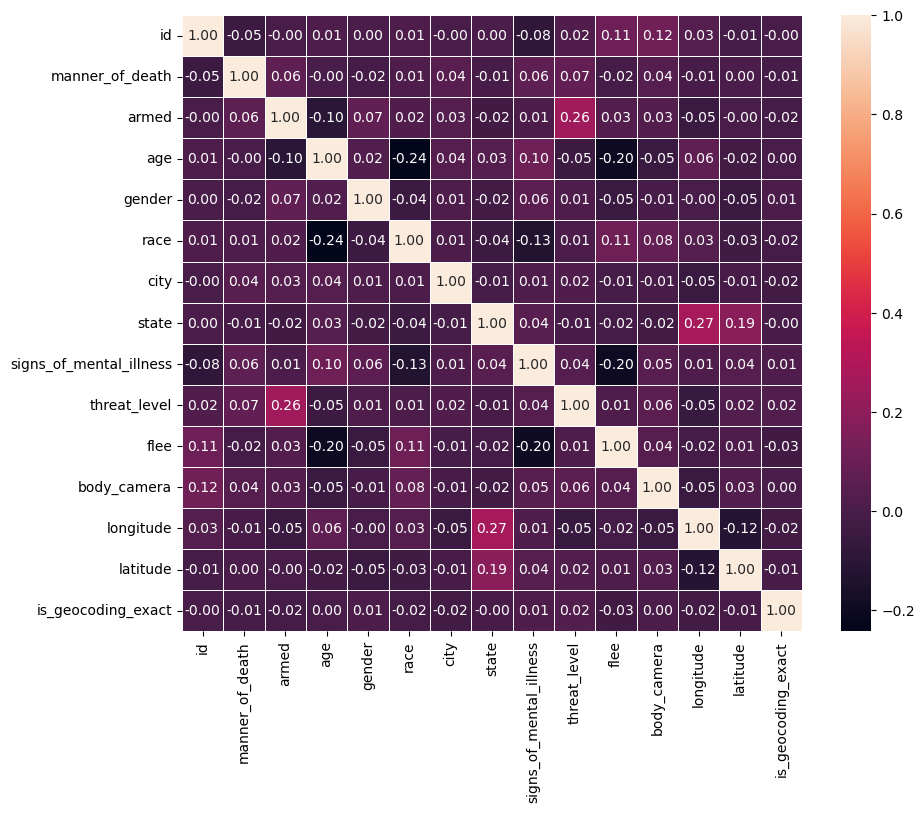

In [48]:
correlation_matrix = data.corr() 

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as per your preference
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)

In [ ]:
# Select relevant features for clustering
features = data[['age', 'longitude', 'latitude']]

# Standardize the features (important for clustering algorithms)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

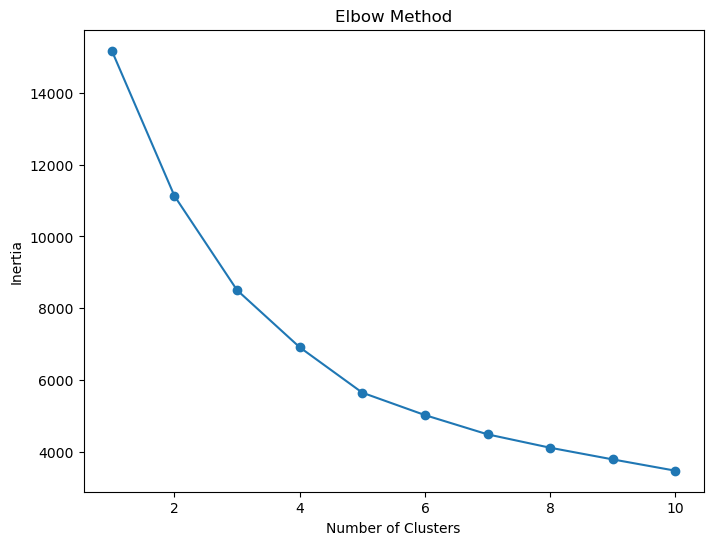

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    
# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



# Based on the Elbow Method, choose the optimal number of clusters (let's say k=3)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


# Add the cluster labels to the original dataset
data['cluster'] = clusters

In [ ]:
# Now, 'data' contains an additional column 'cluster' indicating the cluster each incident belongs to
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,cluster
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,4
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,4
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,3
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,1


In [ ]:
kmeans.labels_

array([4, 4, 3, ..., 0, 3, 4], dtype=int32)